In [16]:
import pandas as pd

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
#Importing Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import ExtraTreeClassifier 
from sklearn.neural_network import MLPClassifier, MLPRegressor

Determine the dataset to operate on

The datasets are tested on:
- bike rental    -> datasets/bike_rental/london_merged.csv"
    label: cnt
- house pricing  -> 
    label: 
- heart failure  -> datasets/heart_failure/heart_failure_clinical_records_dataset.csv"
    label: DEATH_EVENT

Data whole data set operations are base on a pandas DataFrame 

In [17]:
path = "datasets/bike_rental/london_merged.csv"
label = "cnt"
exclude = ["timestamp"]

path = "datasets/heart_failure/heart_failure_clinical_records_dataset.csv"
label = "DEATH_EVENT"
exclude = []

In [18]:
data = pd.read_csv(path,index_col = False)

y = data[label]
X = data.loc[:, data.columns != label]
features = data.columns.drop(label)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In case of data augmentation or feature engineering you could insert corresponding methods right here

But be aware that the features might lose their initial distribution and mean

In [19]:
normalize_data = True

# extract std and mean from original data
stds = X_train.std().to_numpy()
means = X_train.mean().to_numpy()

if normalize_data:
    ss = StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)

Now choose a model that you would like to investigate with the ALE Plots
From sklearn there is ton of differnt models you could take

- KNeighborsClassifier
- SGDClassifier
- LogisticRegression
- RandomForestClassifier
- GradientBoostingClassifier
- AdaBoostClassifier
- BaggingClassifier
- SVC
- GaussianNB
- DummyClassifier
- ExtraTreeClassifier
- MLPClassifier
- MLPRegressor


In [20]:
model = MLPClassifier()
model = model.fit(X_train, y_train)

# evaluate the models performace to check if it has done its thing properly
prediction = model.predict(X_test)
accuracy = accuracy_score(prediction,y_test)
print(f"Model test accuracy is at {accuracy * 100}%")

Model test accuracy is at 78.33333333333333%


/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Create our ALE Plots
1D Main Effect ALE Plot



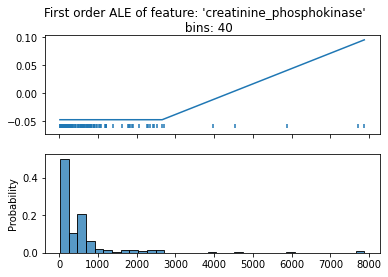

(array([-0.04743375, -0.04743375, -0.04743375, -0.04743375, -0.04743375,
        -0.04743375, -0.04743375, -0.04743375, -0.04743375, -0.04743375,
        -0.04743375, -0.04743375, -0.04743375, -0.04743375, -0.04743375,
        -0.04743375, -0.04743375, -0.04743375, -0.04743375, -0.04743375,
        -0.04743375, -0.04743375, -0.04743375, -0.04743375, -0.04743375,
        -0.04743375, -0.04743375, -0.04743375, -0.04743375, -0.04743375,
        -0.04743375, -0.04743375, -0.04743375, -0.04743375, -0.04743375,
         0.0954234 ]),
 array([  21.85013067,   51.91308981,   57.92568164,   60.93197756,
          64.94037211,   67.94666803,   76.96555577,   82.9781476 ,
          91.99703534,  102.01802172,  112.03900811,  121.05789585,
         127.07048768,  130.07678359,  142.10196725,  148.11455908,
         166.15233457,  184.19011006,  202.22788554,  230.28664741,
         245.31812699,  256.34121201,  291.41466434,  327.49021532,
         399.64131727,  552.96240891,  582.02326942,  624.

In [21]:
from src.ALE import ale

# for feature in features:
ale(model,
    pd.DataFrame(X_train, columns=features),
    columns = ("creatinine_phosphokinase", ),
    grid_shape = (40,),
    show = True,
    std = stds,
    mean = means,)

In [22]:
import numpy as np
np.trapz([1,1, -1, -1], [0,4, 4, 8])

0.0

You can also extract the individual scores for example if you want to have a look if your model is stable with respect to the effect one predictor variable has on the prediction. 


Sample more than just one ale_score and picture them all together

/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/hom

<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='Probability'>

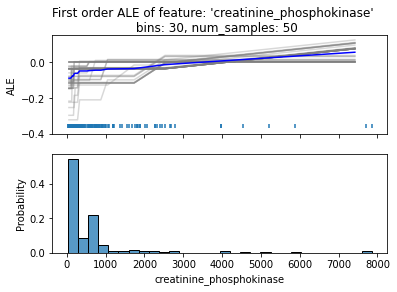

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#  features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
#        'ejection_fraction', 'high_blood_pressure', 'platelets',
#        'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
#        'DEATH_EVENT']

feature = "creatinine_phosphokinase"
column_idx = data.columns.get_loc(feature)

grid_shape = (30,)
num_runs = 50

fig1, axs1 = plt.subplots(nrows=2, ncols=1, sharex=True)
fig1.suptitle(f"First order ALE of feature: '{feature}' \n bins: {grid_shape[0]}, num_samples: {num_runs}")
            
ss = StandardScaler()

std =  data.std().to_numpy()
mean = data.mean().to_numpy()

shuffle = True
scores = np.array([])

for _ in range(num_runs):
    if shuffle:
        sklearn.utils.shuffle(X.to_numpy())
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    X_train_norm = ss.fit_transform(X_train)
    X_test_norm = ss.transform(X_test)

    model = MLPClassifier()
    model = model.fit(X_train_norm, y_train)
    
    prediction = model.predict(X_test_norm)
    accuray = accuracy_score(prediction,y_test)
    # print(f"Model test accuracy is at {accuracy * 100}%")
    
    score, quantiles = ale(model,
                            pd.DataFrame(X_train_norm, columns=features),
                            columns = (feature, ),
                            grid_shape = grid_shape,
                            show = False,
                            std = std, 
                            mean = mean)
    scores = np.append(scores, [[score]])
    axs1[0].plot(quantiles, score, color="grey", alpha=0.3)

scores = np.array(scores)

line_length = (scores.max() - scores.min()) * 0.05 
line_offset = scores.min() - line_length * 1.5
axs1[0].eventplot(data[feature], linelengths=line_length, lineoffsets=line_offset)

# insert aggregated mean
scores_mean = scores.reshape(num_runs, len(scores) // num_runs).mean(axis=0)
axs1[0].plot(quantiles, scores_mean, color="blue")

axs1[0].set_ylabel("ALE")

sns.histplot(X_train[feature], 
                    ax=axs1[1],
                    bins=grid_shape[0], 
                    kde=False,
                    stat="probability")


In [45]:
binary_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking',]

num_samples = 30

diffs = np.empty((num_samples, len(binary_features)))

for i in range(num_samples):
    model = MLPClassifier()
    if shuffle:
        sklearn.utils.shuffle(X.to_numpy())
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    X_train_norm = ss.fit_transform(X_train)
    X_test_norm = ss.transform(X_test)
    
    model = MLPClassifier()
    model = model.fit(X_train_norm, y_train)
    
    prediction = model.predict(X_test_norm)
    accuray = accuracy_score(prediction,y_test)
    
    for idx, feature in enumerate(binary_features):
        X_train_df = pd.DataFrame(X_train_norm, columns=features)
        
        # calculate lower end -> = 0
        X_train_df[feature] = X_train[feature].replace(1, 0)
        low = model.predict(X_train_df)
        # calculate higher end -> = 1
        X_train_df[feature] = X_train[feature].replace(0, 1)
        high = model.predict(X_train_df)
        
        diffs[i, idx] = (high- low).mean()
        
print(diffs.mean(axis=0), diffs.std(axis=0))

/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/minicon

112
94
94
156
78


/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/minicon

112
94
94
156
78


/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/minicon

112
94
94
156
78


/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/minicon

112
94
94
156
78


/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/minicon

112
94
94
156
78


/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/minicon

112
94
94
156
78


/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/minicon

112
94
94
156
78


/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/minicon

112
94
94
156
78


/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/minicon

112
94
94
156
78


/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/minicon

112
94
94
156
78


/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/minicon

112
94
94
156
78


/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/minicon

112
94
94
156
78


/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/minicon

112
94
94
156
78


/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/minicon

112
94
94
156
78


/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/minicon

112
94
94
156
78


/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/minicon

112
94
94
156
78


/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/minicon

112
94
94
156
78


/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/minicon

112
94
94
156
78


/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/minicon

112
94
94
156
78


/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/minicon

112
94
94
156
78


/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/minicon

112
94
94
156
78


/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/minicon

112
94
94
156
78


/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/minicon

112
94
94
156
78


/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/minicon

112
94
94
156
78


/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/minicon

112
94
94
156
78


/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/minicon

112
94
94
156
78


/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/minicon

112
94
94
156
78


/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/minicon

112
94
94
156
78


/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/minicon

112
94
94
156
78
112
94
94
156
78
[-0.03082287 -0.00209205 -0.01436541 -0.05076709  0.00320781] [0.01120023 0.01023467 0.00952183 0.01126517 0.01084015]


/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/miniconda3/envs/ALE/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/robin/minicon